In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

ModuleNotFoundError: No module named 'xgboost'

In [3]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.3 MB/s eta 0:00:00a 0:00:01


In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [7]:
data = pd.read_csv("/Users/rojinkoc/Downloads/diamonds.csv")
data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [9]:
data.shape

(53940, 11)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [13]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [15]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

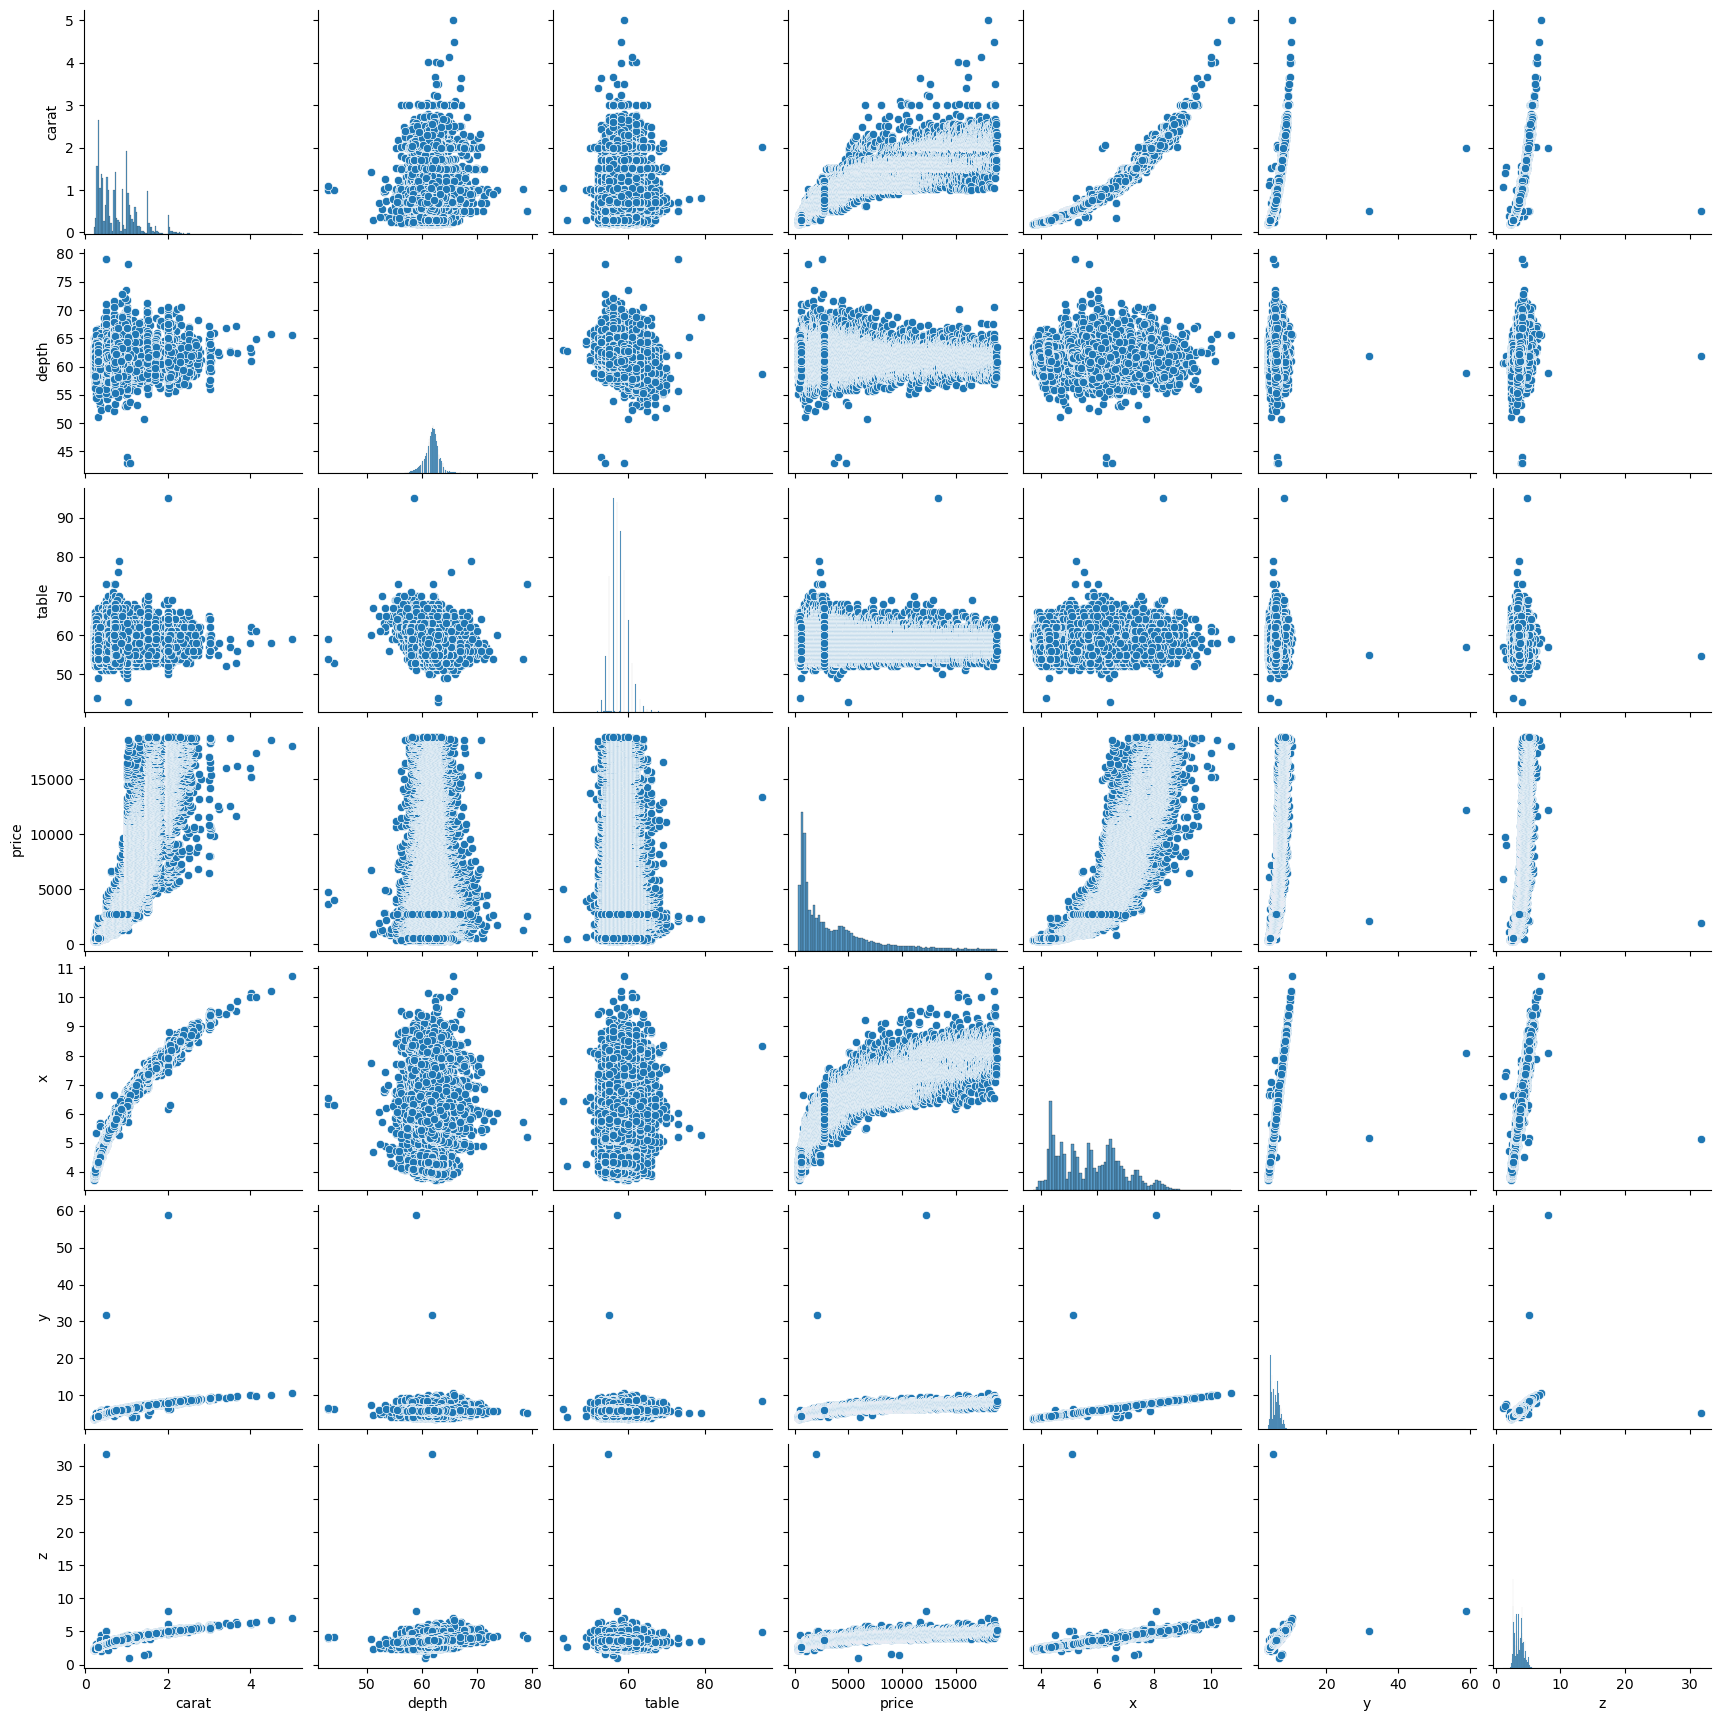

In [18]:
sns.pairplot(data)

In [24]:
data = data[(data["x"] != 0) & (data["y"] != 0) & (data["z"] != 0)]

In [26]:
cols = ["carat", "depth", "table", "price", "x", "y", "z", "cut"]

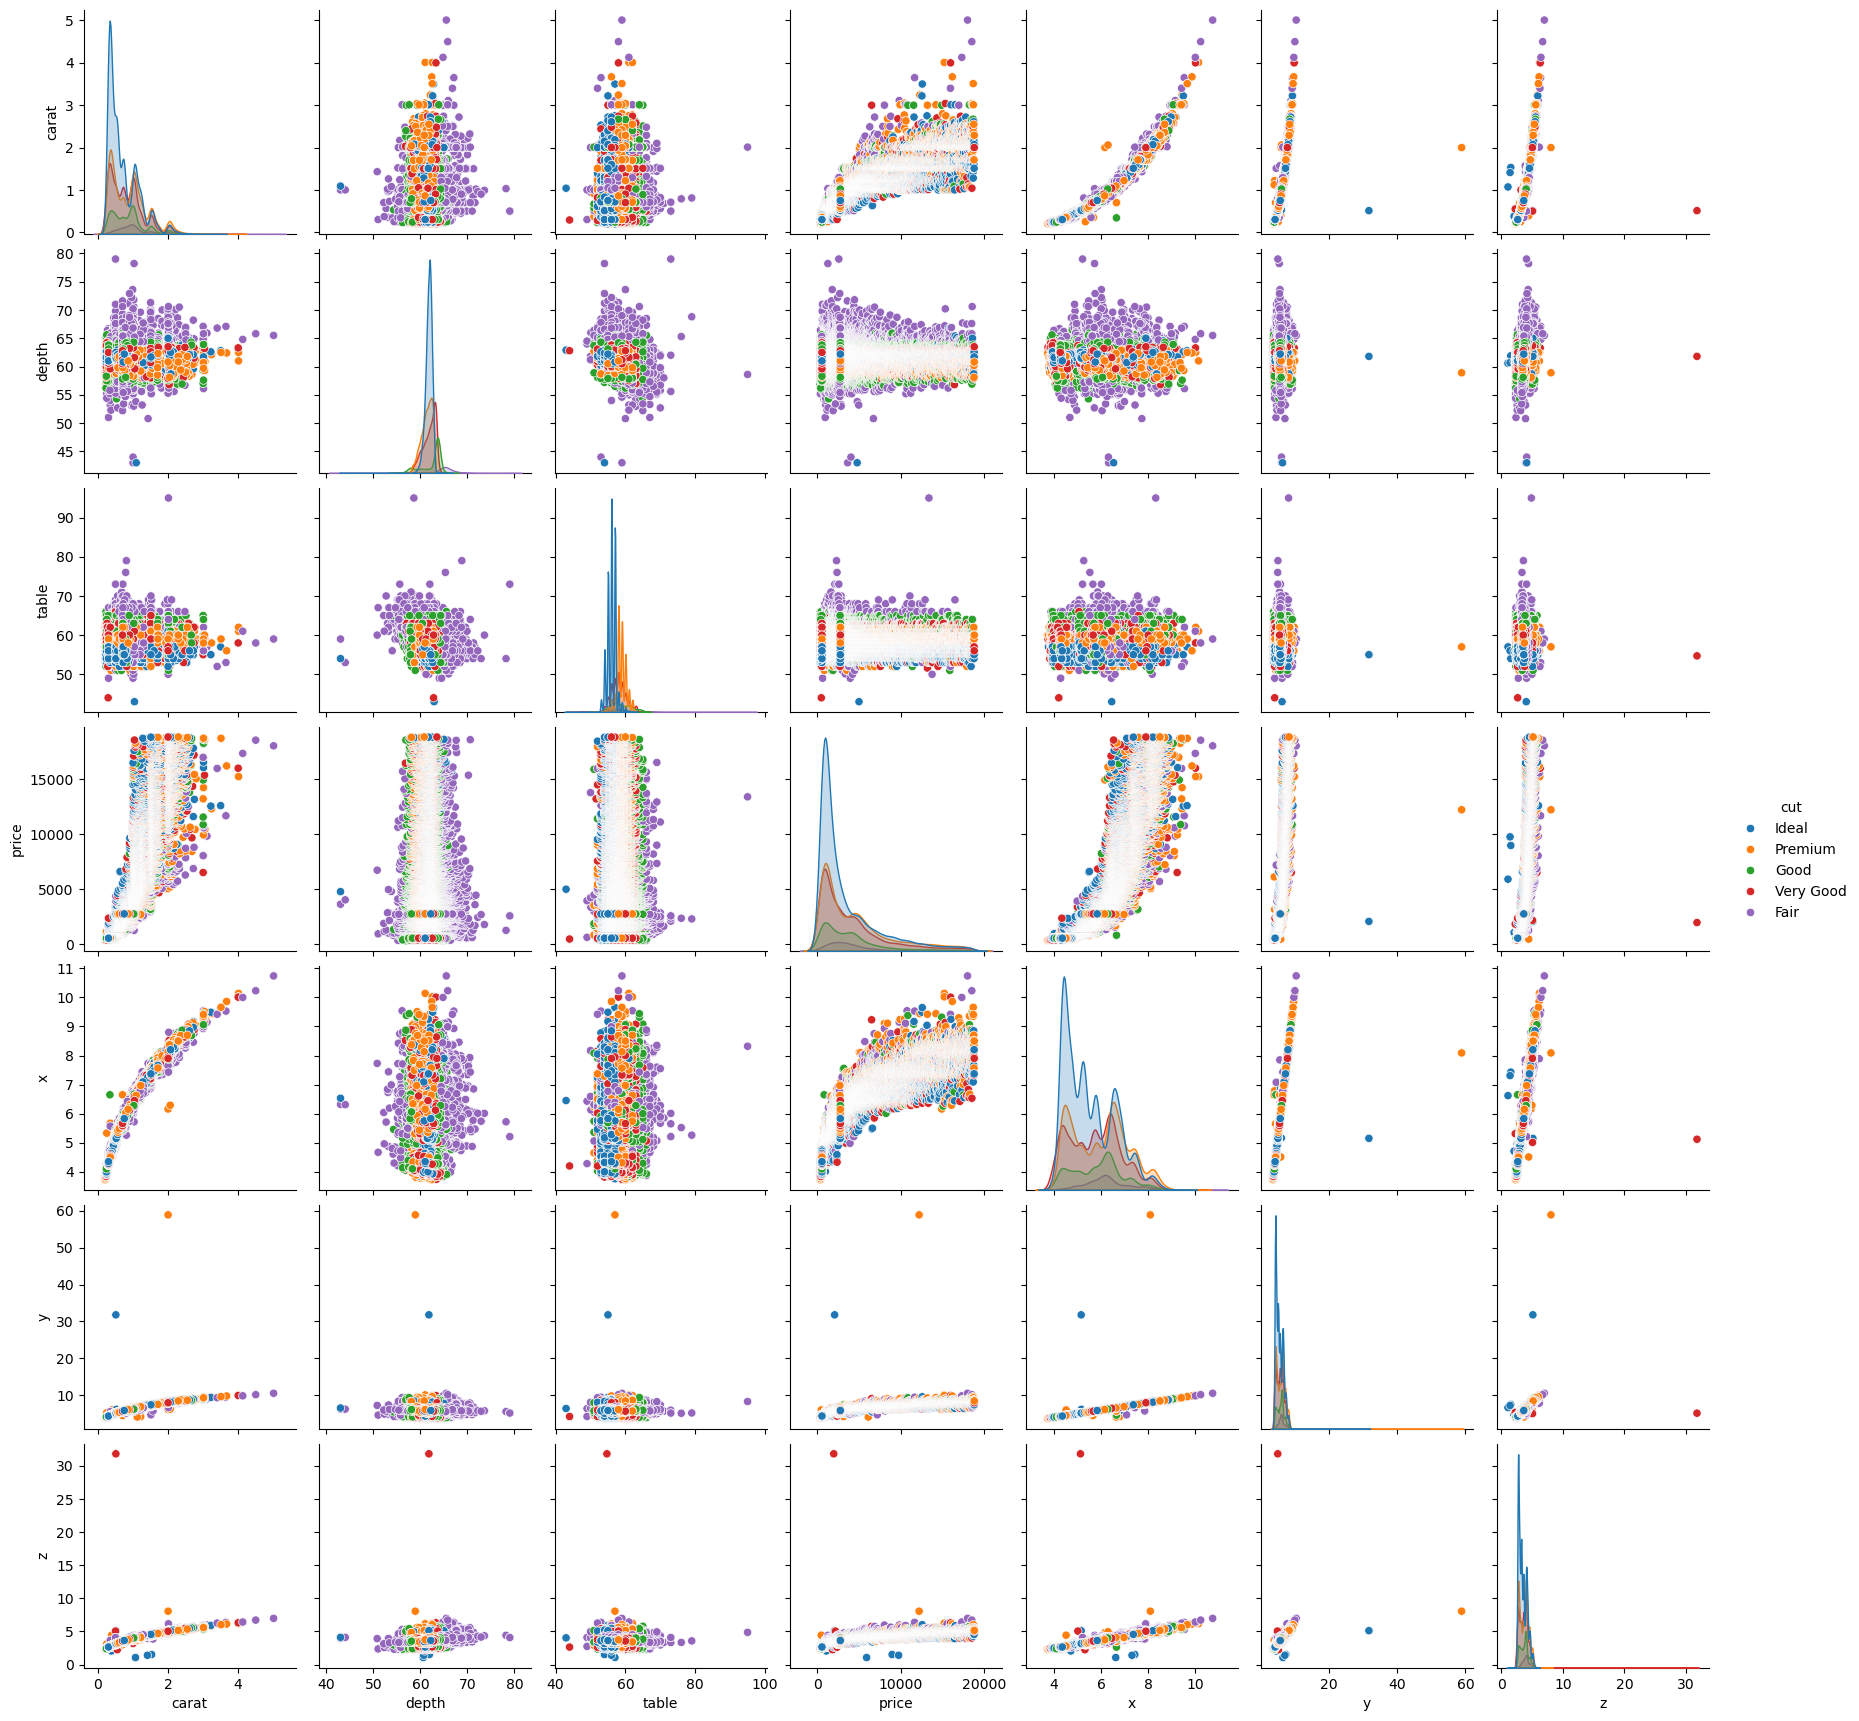

In [28]:
sns.pairplot(data[cols], hue="cut")

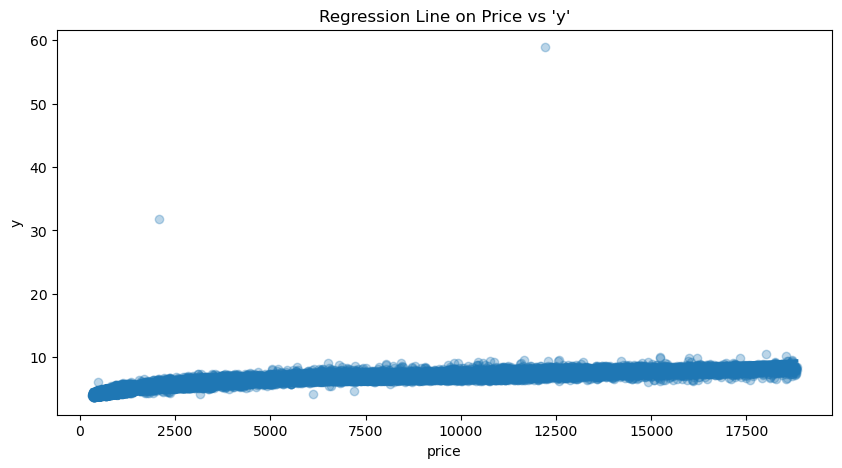

In [31]:
plt.figure(figsize=(10, 5))
sns.regplot(x="price", y="y", data=data, scatter_kws={"alpha":0.3})
plt.title("Regression Line on Price vs 'y'")
plt.show()

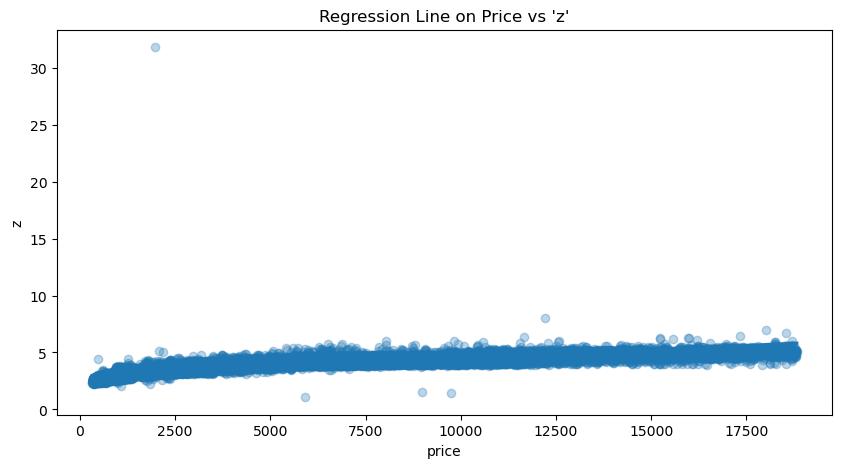

In [33]:
plt.figure(figsize=(10, 5))
sns.regplot(x="price", y="z", data=data, scatter_kws={"alpha":0.3})
plt.title("Regression Line on Price vs 'z'")
plt.show()

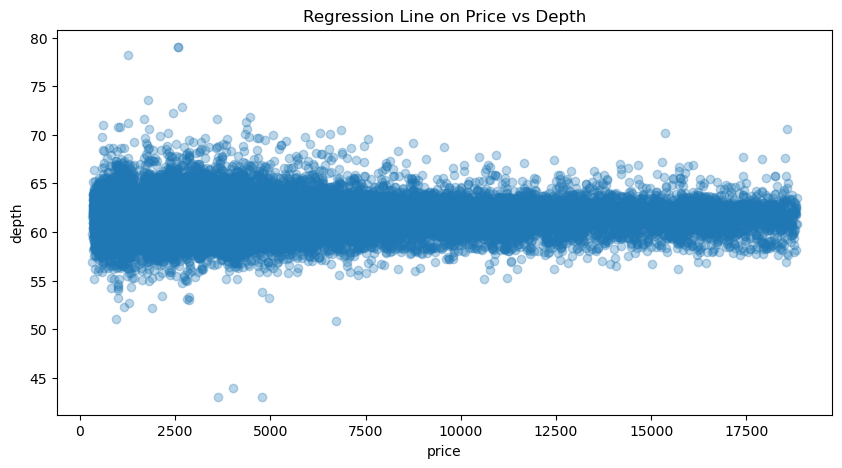

In [35]:
plt.figure(figsize=(10, 5))
sns.regplot(x="price", y="depth", data=data, scatter_kws={"alpha":0.3})
plt.title("Regression Line on Price vs Depth")
plt.show()

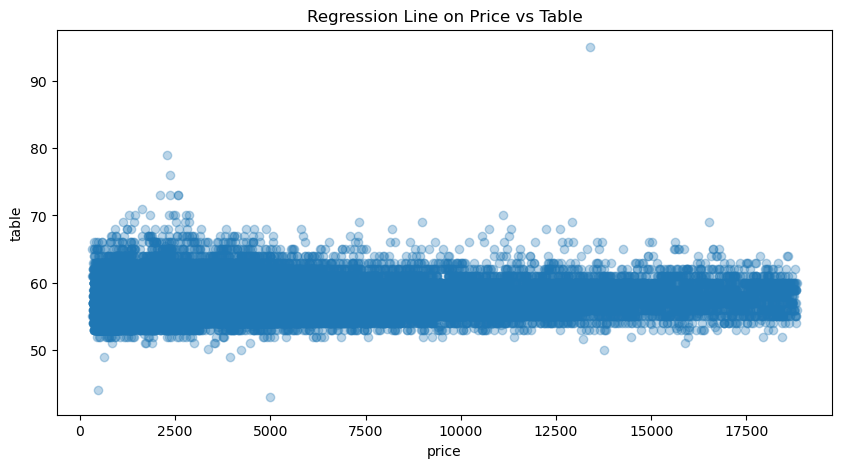

In [37]:
plt.figure(figsize=(10, 5))
sns.regplot(x="price", y="table", data=data, scatter_kws={"alpha":0.3})
plt.title("Regression Line on Price vs Table")
plt.show()

In [39]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

In [41]:
ax=sns.pairplot(data, hue= "cut",palette=shade)

NameError: name 'shade' is not defined

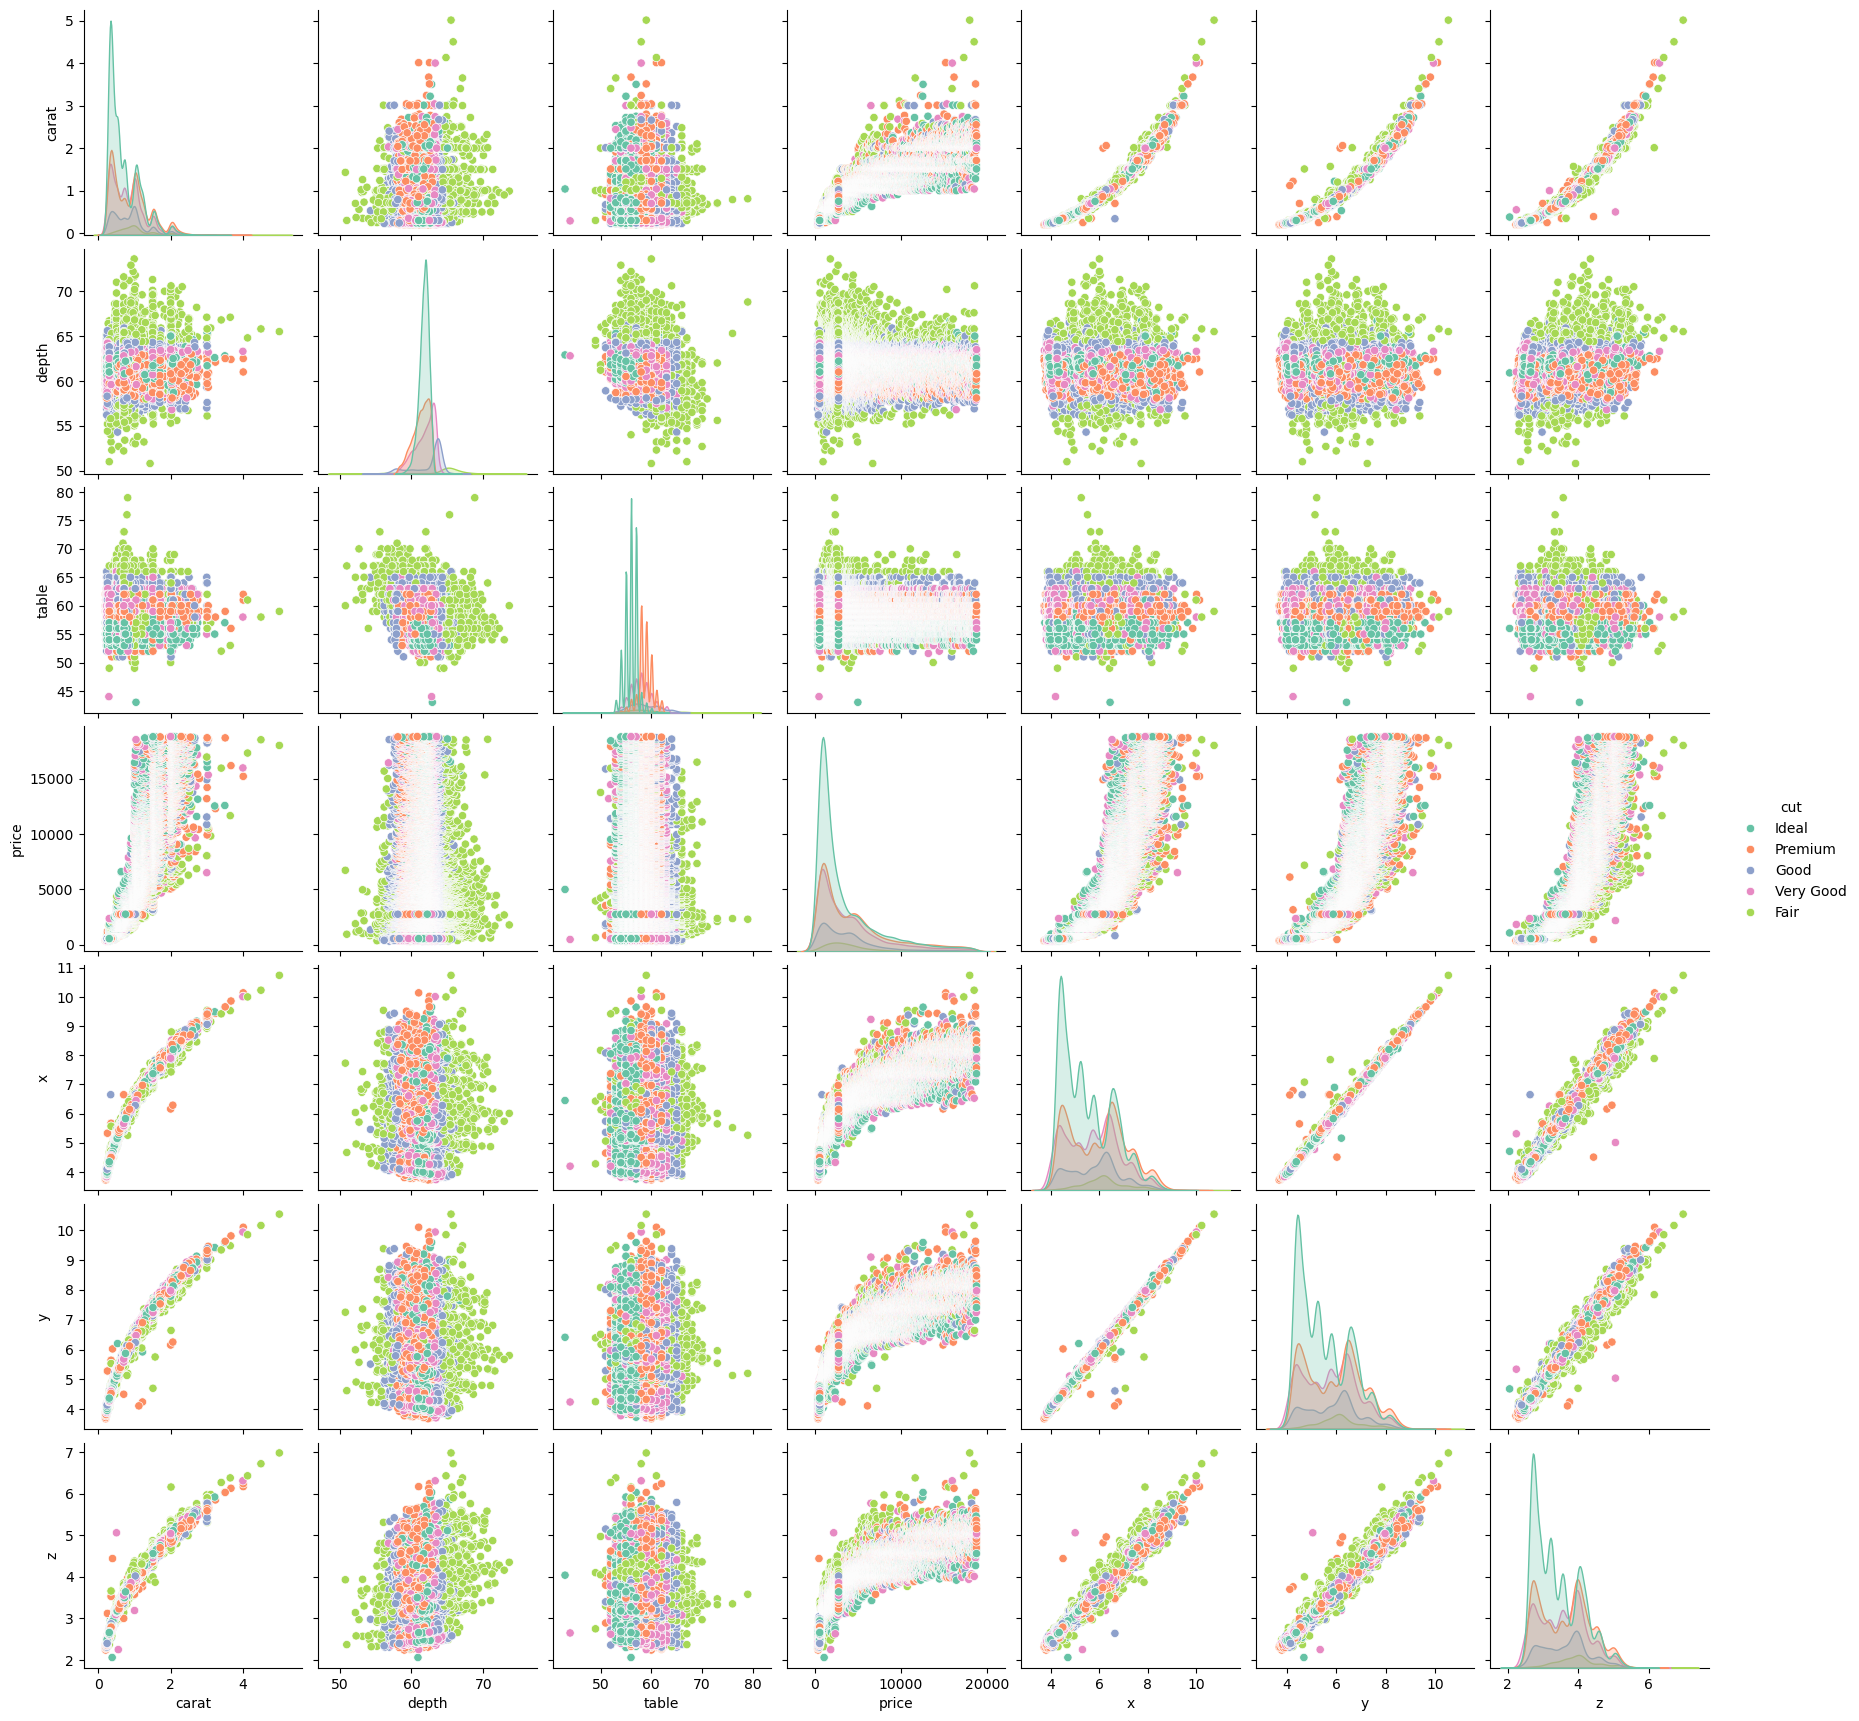

In [43]:
sns.pairplot(data, hue="cut", palette="Set2")

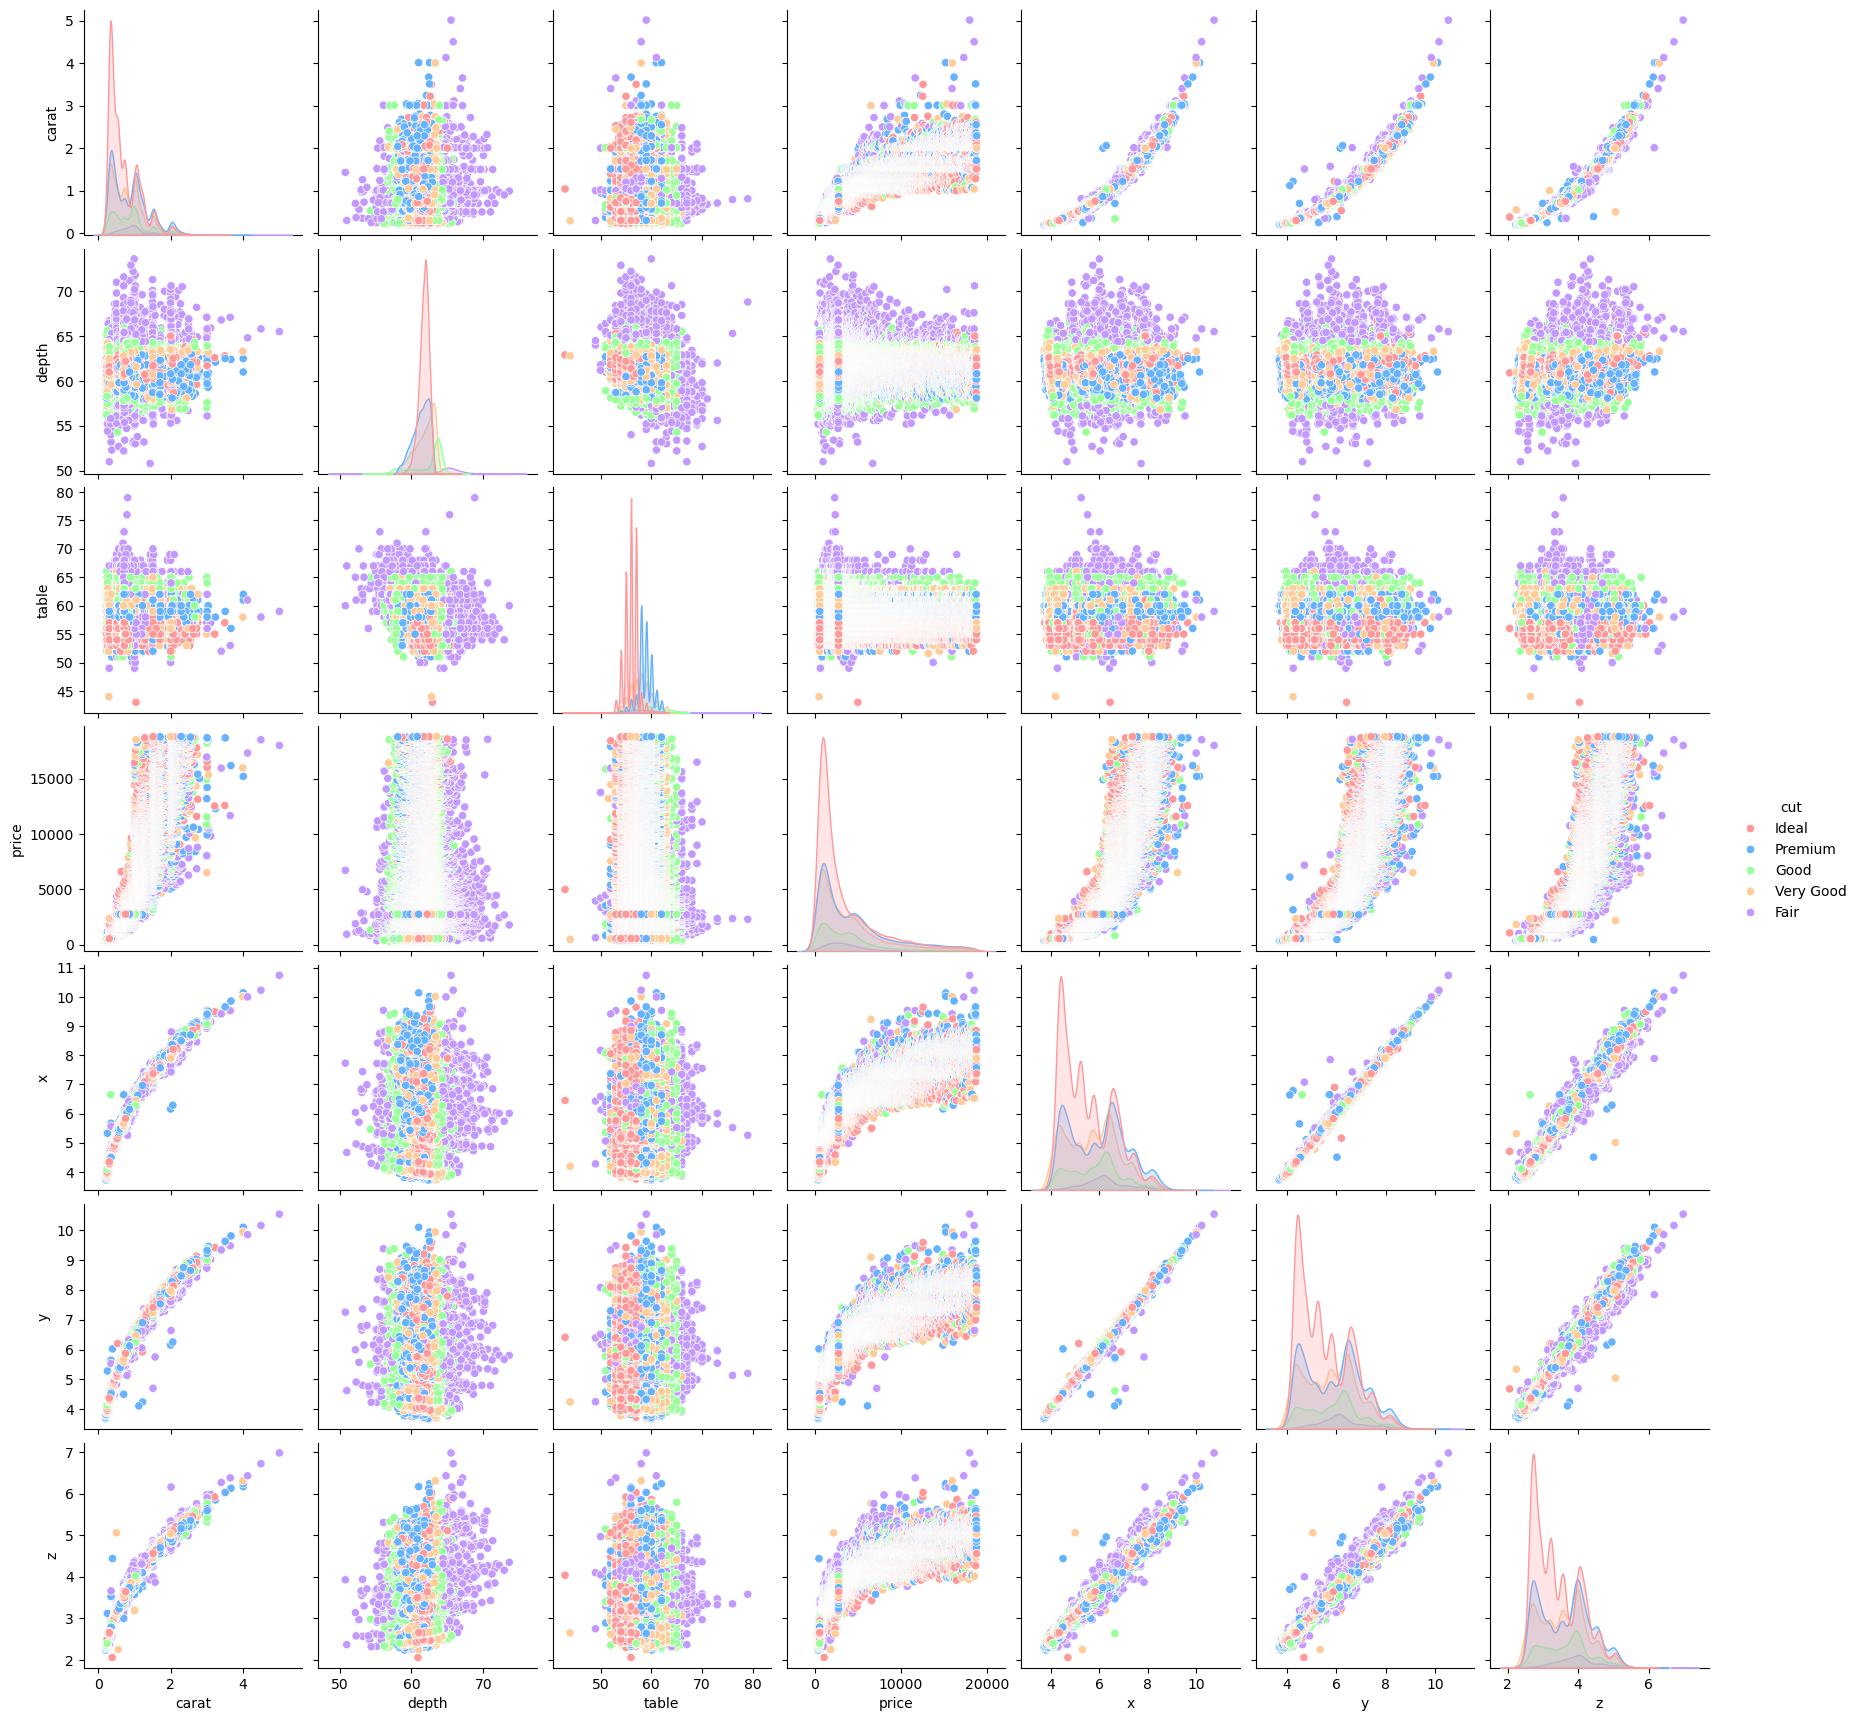

In [45]:
shade = {
    "Ideal": "#FF9999",
    "Premium": "#66B2FF",
    "Good": "#99FF99",
    "Very Good": "#FFCC99",
    "Fair": "#C299FF"
}
sns.pairplot(data, hue="cut", palette=shade)

In [47]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


/var/folders/rn/ncp8740d1db18c72mr94nnxc0000gn/T/ipykernel_4979/360792770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="cut", y="price", data=data, palette="muted")


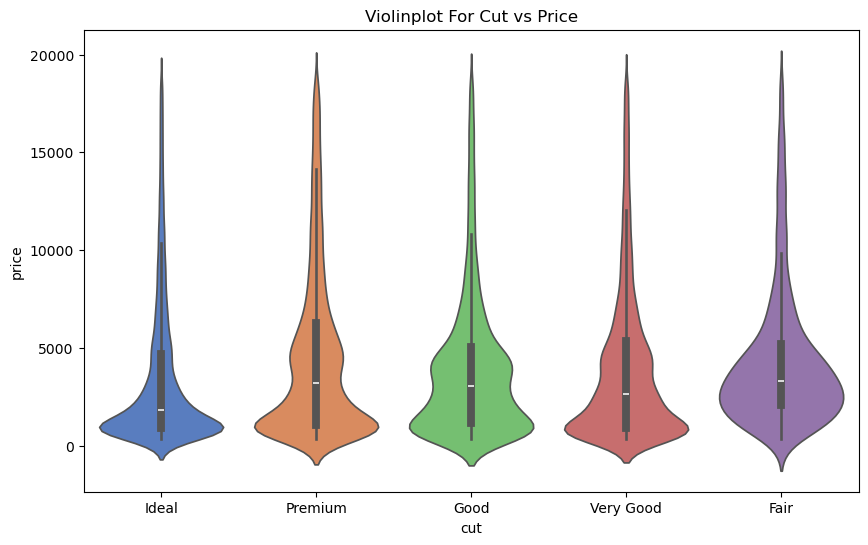

In [49]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="cut", y="price", data=data, palette="muted")
plt.title("Violinplot For Cut vs Price")
plt.show()

In [57]:
data_raw = pd.read_csv("/Users/rojinkoc/Downloads/diamonds.csv")

/var/folders/rn/ncp8740d1db18c72mr94nnxc0000gn/T/ipykernel_4979/3281443582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="cut", y="price", data=data_raw, palette="pastel")


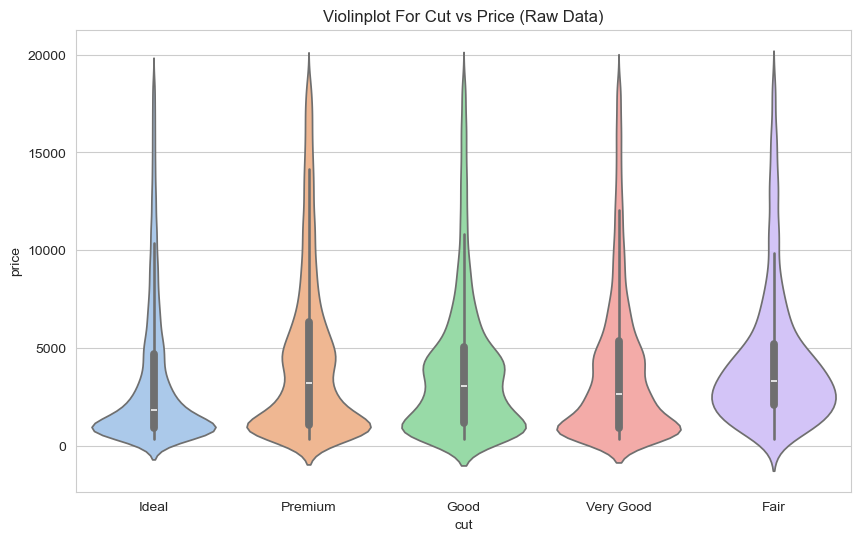

In [59]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="cut", y="price", data=data_raw, palette="pastel")
plt.title("Violinplot For Cut vs Price (Raw Data)")
plt.show()

/var/folders/rn/ncp8740d1db18c72mr94nnxc0000gn/T/ipykernel_4979/990142439.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="cut", y="price", data=data_sample, palette="pastel")


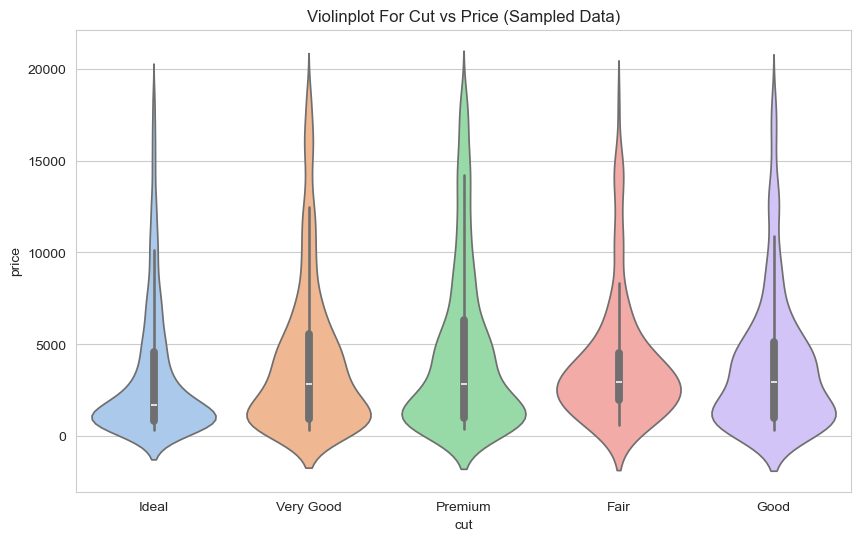

In [61]:
# Ham veriyi tekrar yükle
data_raw = pd.read_csv("/Users/rojinkoc/Downloads/diamonds.csv")

# Örnekleme yap (örneğin 5000 satır)
data_sample = data_raw.sample(n=5000, random_state=42)

# Grafik çizimi
plt.figure(figsize=(10, 6))
sns.violinplot(x="cut", y="price", data=data_sample, palette="pastel")
plt.title("Violinplot For Cut vs Price (Sampled Data)")
plt.show()


/var/folders/rn/ncp8740d1db18c72mr94nnxc0000gn/T/ipykernel_4979/4175652681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="color", y="price", data=data, palette="pastel")


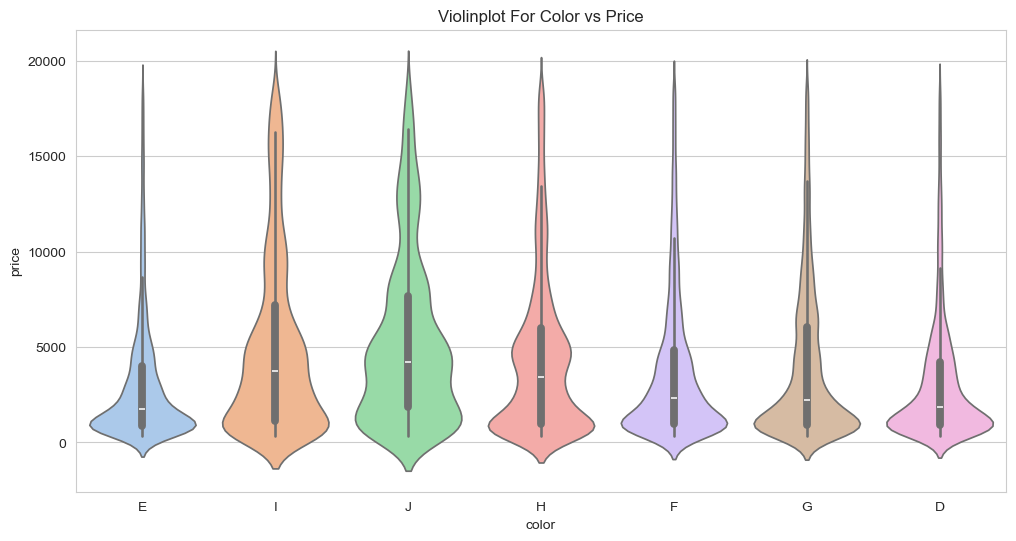

In [63]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="color", y="price", data=data, palette="pastel")
plt.title("Violinplot For Color vs Price")
plt.show()

/var/folders/rn/ncp8740d1db18c72mr94nnxc0000gn/T/ipykernel_4979/2167899209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="clarity", y="price", data=data, palette="pastel")


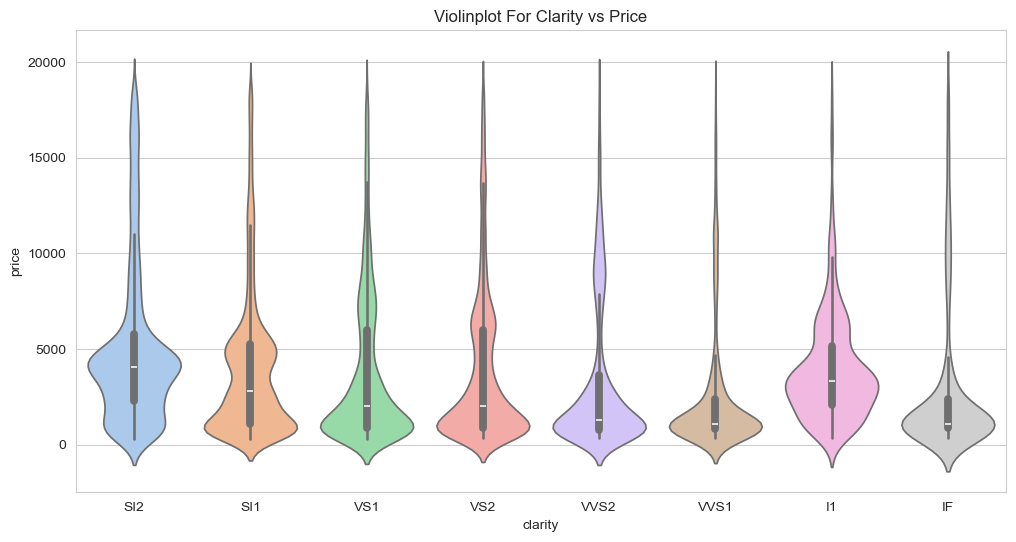

In [65]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="clarity", y="price", data=data, palette="pastel")
plt.title("Violinplot For Clarity vs Price")
plt.show()

In [67]:
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [69]:
data.describe()

carat         depth         table         price             x  \
count  53907.000000  53907.000000  53907.000000  53907.000000  53907.000000   
mean       0.797628     61.749741     57.455948   3930.584470      5.731463   
std        0.473765      1.420119      2.226153   3987.202815      1.119384   
min        0.200000     50.800000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5322.000000      6.540000   
max        5.010000     73.600000     79.000000  18823.000000     10.740000   

                  y             z  
count  53907.000000  53907.000000  
mean       5.733292      3.539441  
std        1.111252      0.691434  
min        3.680000      2.060000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       10.540000      6.980000

<Axes: >

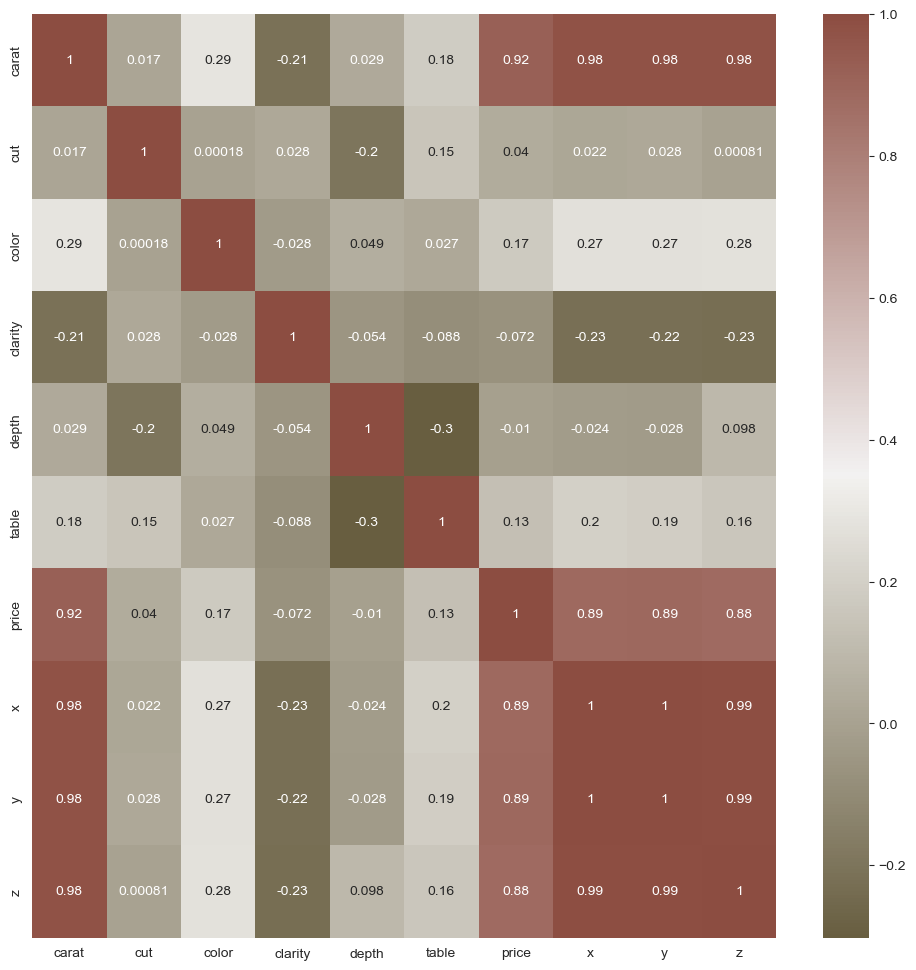

In [71]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [73]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [75]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)


In [77]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -749.822862 
RandomForest: -548.021667 
KNeighbors: -823.649220 
XGBRegressor: -547.645088 


In [79]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [81]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9803842902183533
Adjusted R^2: 0.9803711810338256
MAE: 280.1733446465832
MSE: 307728.16599314264
RMSE: 554.7325175191577


In [87]:
# Test veri setinden bir örnek al
sample = X_test.iloc[5]
sample_true_price = y_test.iloc[5]

# Tahmin yap
sample_predicted_price = pipeline_xgb.predict([sample])

print("Gerçek fiyat:", sample_true_price)
print("Tahmin edilen fiyat:", sample_predicted_price)

Gerçek fiyat: 2080
Tahmin edilen fiyat: [2991.136]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [101]:
print(label_data["cut"].unique())
print(label_data["color"].unique())
print(label_data["clarity"].unique())


[2 3 1 4 0]
[1 5 6 4 2 3 0]
[3 2 4 5 7 6 0 1]


In [103]:
print(data["cut"].unique())
print(data["color"].unique())
print(data["clarity"].unique())


['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [105]:
# Kullanıcıdan yeni elmas bilgisi al
new_diamond = {
    "carat": 0.25,
    "cut": "Ideal",
    "color": "E",
    "clarity": "VS2",
    "depth": 62.4,
    "table": 58.0,
    "x": 3.99,
    "y": 4.05,
    "z": 2.51
}

# Önce mapping tablolarını tanımlayalım:
cut_mapping = {
    "Ideal": 2,
    "Premium": 3,
    "Good": 1,
    "Very Good": 4,
    "Fair": 0
}

color_mapping = {
    "E": 1,
    "I": 5,
    "J": 6,
    "H": 4,
    "F": 2,
    "G": 3,
    "D": 0
}

clarity_mapping = {
    "SI2": 3,
    "SI1": 2,
    "VS1": 4,
    "VS2": 5,
    "VVS2": 7,
    "VVS1": 6,
    "I1": 0,
    "IF": 1
}

# String kategorileri sayıya çevir
new_diamond_encoded = {
    "carat": new_diamond["carat"],
    "cut": cut_mapping[new_diamond["cut"]],
    "color": color_mapping[new_diamond["color"]],
    "clarity": clarity_mapping[new_diamond["clarity"]],
    "depth": new_diamond["depth"],
    "table": new_diamond["table"],
    "x": new_diamond["x"],
    "y": new_diamond["y"],
    "z": new_diamond["z"]
}

# DataFrame yap
new_diamond_df = pd.DataFrame([new_diamond_encoded])

# Tahmin yap
predicted_price = pipeline_xgb.predict(new_diamond_df)

# Sonucu yazdır
print("Tahmin edilen elmas fiyatı:", predicted_price[0])


Tahmin edilen elmas fiyatı: 472.6684


In [107]:
# Kullanıcıdan yeni elmas bilgisi al
new_diamond = {
    "carat": 1.00,
    "cut": "Very Good",
    "color": "H",
    "clarity": "SI1",
    "depth": 63.7,
    "table": 63,
    "x": 8.34,
    "y": 5.48,
    "z": 3.49
}

# Önce mapping tablolarını tanımlayalım:
cut_mapping = {
    "Ideal": 2,
    "Premium": 3,
    "Good": 1,
    "Very Good": 4,
    "Fair": 0
}

color_mapping = {
    "E": 1,
    "I": 5,
    "J": 6,
    "H": 4,
    "F": 2,
    "G": 3,
    "D": 0
}

clarity_mapping = {
    "SI2": 3,
    "SI1": 2,
    "VS1": 4,
    "VS2": 5,
    "VVS2": 7,
    "VVS1": 6,
    "I1": 0,
    "IF": 1
}

# String kategorileri sayıya çevir
new_diamond_encoded = {
    "carat": new_diamond["carat"],
    "cut": cut_mapping[new_diamond["cut"]],
    "color": color_mapping[new_diamond["color"]],
    "clarity": clarity_mapping[new_diamond["clarity"]],
    "depth": new_diamond["depth"],
    "table": new_diamond["table"],
    "x": new_diamond["x"],
    "y": new_diamond["y"],
    "z": new_diamond["z"]
}

# DataFrame yap
new_diamond_df = pd.DataFrame([new_diamond_encoded])

# Tahmin yap
predicted_price = pipeline_xgb.predict(new_diamond_df)

# Sonucu yazdır
print("Tahmin edilen elmas fiyatı:", predicted_price[0])


Tahmin edilen elmas fiyatı: 1257.4109


In [111]:
# Kullanıcıdan yeni elmas bilgisi al
new_diamond = {
    "carat": 0.23,
    "cut": "Ideal",
    "color": "E",
    "clarity": "SI2",
    "depth": 61.5,
    "table": 55.0,
    "x": 3.95,
    "y": 3.98,
    "z": 2.43
}

# Önce mapping tablolarını tanımlayalım:
cut_mapping = {
    "Ideal": 2,
    "Premium": 3,
    "Good": 1,
    "Very Good": 4,
    "Fair": 0
}

color_mapping = {
    "E": 1,
    "I": 5,
    "J": 6,
    "H": 4,
    "F": 2,
    "G": 3,
    "D": 0
}

clarity_mapping = {
    "SI2": 3,
    "SI1": 2,
    "VS1": 4,
    "VS2": 5,
    "VVS2": 7,
    "VVS1": 6,
    "I1": 0,
    "IF": 1
}

# String kategorileri sayıya çevir
new_diamond_encoded = {
    "carat": new_diamond["carat"],
    "cut": cut_mapping[new_diamond["cut"]],
    "color": color_mapping[new_diamond["color"]],
    "clarity": clarity_mapping[new_diamond["clarity"]],
    "depth": new_diamond["depth"],
    "table": new_diamond["table"],
    "x": new_diamond["x"],
    "y": new_diamond["y"],
    "z": new_diamond["z"]
}

# DataFrame yap
new_diamond_df = pd.DataFrame([new_diamond_encoded])

# Tahmin yap
predicted_price = pipeline_xgb.predict(new_diamond_df)

# Sonucu yazdır
print("Tahmin edilen elmas fiyatı:", predicted_price[0])


Tahmin edilen elmas fiyatı: 295.18884


In [117]:
# Kullanıcıdan yeni elmas bilgisi al
new_diamond = {
    "carat": 0.29,
    "cut": "Premium",
    "color": "I",
    "clarity": "VS2",
    "depth": 62.4,
    "table": 58,
    "x": 4.2,
    "y": 4.23,
    "z": 2.63
}

# Önce mapping tablolarını tanımlayalım:
cut_mapping = {
    "Ideal": 2,
    "Premium": 3,
    "Good": 1,
    "Very Good": 4,
    "Fair": 0
}

color_mapping = {
    "E": 1,
    "I": 5,
    "J": 6,
    "H": 4,
    "F": 2,
    "G": 3,
    "D": 0
}

clarity_mapping = {
    "SI2": 3,
    "SI1": 2,
    "VS1": 4,
    "VS2": 5,
    "VVS2": 7,
    "VVS1": 6,
    "I1": 0,
    "IF": 1
}

# String kategorileri sayıya çevir
new_diamond_encoded = {
    "carat": new_diamond["carat"],
    "cut": cut_mapping[new_diamond["cut"]],
    "color": color_mapping[new_diamond["color"]],
    "clarity": clarity_mapping[new_diamond["clarity"]],
    "depth": new_diamond["depth"],
    "table": new_diamond["table"],
    "x": new_diamond["x"],
    "y": new_diamond["y"],
    "z": new_diamond["z"]
}

# DataFrame yap
new_diamond_df = pd.DataFrame([new_diamond_encoded])

# Tahmin yap
predicted_price = pipeline_xgb.predict(new_diamond_df)

# Sonucu yazdır
print("Tahmin edilen elmas fiyatı:", predicted_price[0])


Tahmin edilen elmas fiyatı: 426.78076


In [119]:
# Outlier temizleme

# 1. Çok küçük ve çok büyük carat değerlerini çıkar
data = data[(data['carat'] > 0.2) & (data['carat'] < 5)]

# 2. x, y, z değerleri sıfır veya çok büyük olanları çıkar
data = data[(data['x'] > 0) & (data['y'] > 0) & (data['z'] > 0)]
data = data[(data['x'] < 10) & (data['y'] < 10) & (data['z'] < 10)]

# 3. depth oranını normal sınırda tut
data = data[(data['depth'] >= 58) & (data['depth'] <= 64)]

# 4. table oranını normal sınırda tut
data = data[(data['table'] >= 50) & (data['table'] <= 70)]

# Sonuç
print("Outlier temizlendikten sonra kalan veri sayısı:", data.shape)


Outlier temizlendikten sonra kalan veri sayısı: (51445, 10)


In [121]:
from sklearn.preprocessing import LabelEncoder

# Temizlenmiş data'dan bir kopya al
label_data = data.copy()

# Sadece object (kategori) tipindeki kolonları seç
object_cols = label_data.select_dtypes(include=['object']).columns

# Her kategorik kolonu LabelEncoder ile dönüştür
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

# Kontrol edelim
label_data.head()


carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
5   0.24    4      6        7   62.8   57.0    336  3.94  3.96  2.48

In [123]:
from sklearn.model_selection import train_test_split

X = label_data.drop(["price"], axis=1)
y = label_data["price"]

# %25 test - %75 eğitim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [125]:
# Pipeline oluştur (Scaler + Model)
pipeline_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBRegressor())
])

# Pipeline'ı eğit
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [127]:
# Test verisinde tahmin yap
pred = pipeline_xgb.predict(X_test)

# Performans metrikleri
print("R2:", metrics.r2_score(y_test, pred))
print("Adjusted R2:", 1 - (1 - metrics.r2_score(y_test, pred)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))
print("MAE:", metrics.mean_absolute_error(y_test, pred))
print("MSE:", metrics.mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2: 0.9815332293510437
Adjusted R2: 0.9815202974388245
MAE: 271.1374906024746
MSE: 293149.90036017046
RMSE: 541.4331910403816


In [131]:
# Kullanıcıdan yeni elmas bilgisi al
new_diamond = {
    "carat": 0.23,
    "cut": "Ideal",
    "color": "E",
    "clarity": "SI2",
    "depth": 61.5,
    "table": 55,
    "x": 3.95,
    "y": 3.98,
    "z": 2.43
}

# Önce mapping tablolarını tanımlayalım:
cut_mapping = {
    "Ideal": 2,
    "Premium": 3,
    "Good": 1,
    "Very Good": 4,
    "Fair": 0
}

color_mapping = {
    "E": 1,
    "I": 5,
    "J": 6,
    "H": 4,
    "F": 2,
    "G": 3,
    "D": 0
}

clarity_mapping = {
    "SI2": 3,
    "SI1": 2,
    "VS1": 4,
    "VS2": 5,
    "VVS2": 7,
    "VVS1": 6,
    "I1": 0,
    "IF": 1
}

# String kategorileri sayıya çevir
new_diamond_encoded = {
    "carat": new_diamond["carat"],
    "cut": cut_mapping[new_diamond["cut"]],
    "color": color_mapping[new_diamond["color"]],
    "clarity": clarity_mapping[new_diamond["clarity"]],
    "depth": new_diamond["depth"],
    "table": new_diamond["table"],
    "x": new_diamond["x"],
    "y": new_diamond["y"],
    "z": new_diamond["z"]
}

# DataFrame yap
new_diamond_df = pd.DataFrame([new_diamond_encoded])

# Tahmin yap
predicted_price = pipeline_xgb.predict(new_diamond_df)

# Sonucu yazdır
print("Tahmin edilen elmas fiyatı:", predicted_price[0])

Tahmin edilen elmas fiyatı: 299.96887


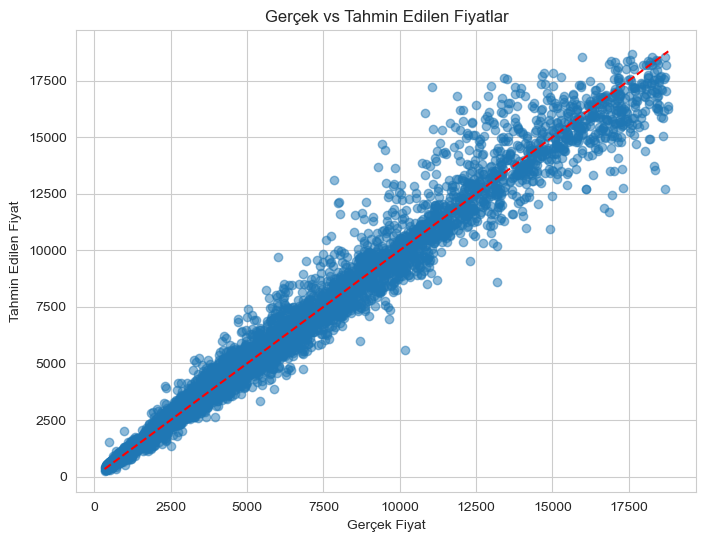

In [133]:
# Gerçek ve tahmin edilen değerleri yan yana çizelim
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Kırmızı kesikli doğru (ideal tahmin çizgisi)
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('Gerçek vs Tahmin Edilen Fiyatlar')
plt.show()

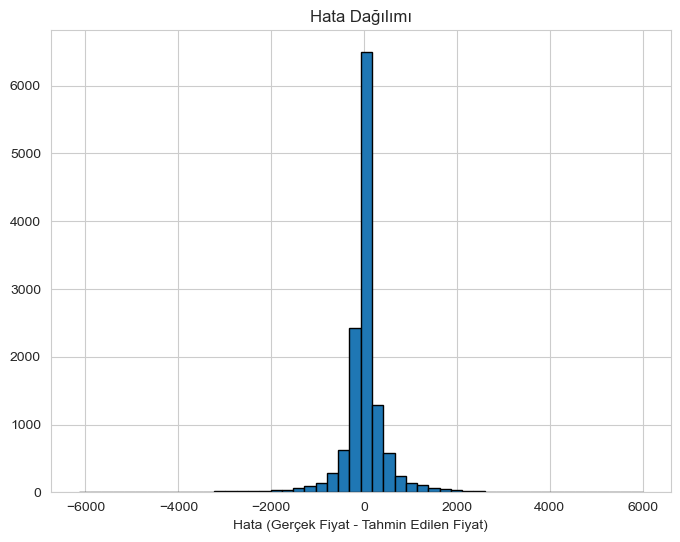

In [135]:
# Hata (residual) hesapla
errors = y_test - pred

plt.figure(figsize=(8,6))
plt.hist(errors, bins=50, edgecolor='k')
plt.xlabel('Hata (Gerçek Fiyat - Tahmin Edilen Fiyat)')
plt.title('Hata Dağılımı')
plt.show()

In [137]:
# Kullanıcıdan yeni elmas bilgisi al
new_diamond = {
    "carat": 0.29,
    "cut": "Premium",
    "color": "I",
    "clarity": "VS2",
    "depth": 62.4,
    "table": 58,
    "x": 4.2,
    "y": 4.23,
    "z": 2.63
}

# Önce mapping tablolarını tanımlayalım:
cut_mapping = {
    "Ideal": 2,
    "Premium": 3,
    "Good": 1,
    "Very Good": 4,
    "Fair": 0
}

color_mapping = {
    "E": 1,
    "I": 5,
    "J": 6,
    "H": 4,
    "F": 2,
    "G": 3,
    "D": 0
}

clarity_mapping = {
    "SI2": 3,
    "SI1": 2,
    "VS1": 4,
    "VS2": 5,
    "VVS2": 7,
    "VVS1": 6,
    "I1": 0,
    "IF": 1
}

# String kategorileri sayıya çevir
new_diamond_encoded = {
    "carat": new_diamond["carat"],
    "cut": cut_mapping[new_diamond["cut"]],
    "color": color_mapping[new_diamond["color"]],
    "clarity": clarity_mapping[new_diamond["clarity"]],
    "depth": new_diamond["depth"],
    "table": new_diamond["table"],
    "x": new_diamond["x"],
    "y": new_diamond["y"],
    "z": new_diamond["z"]
}

# DataFrame yap
new_diamond_df = pd.DataFrame([new_diamond_encoded])

# Tahmin yap
predicted_price = pipeline_xgb.predict(new_diamond_df)

# Sonucu yazdır
print("Tahmin edilen elmas fiyatı:", predicted_price[0])

Tahmin edilen elmas fiyatı: 385.87347


In [139]:
# Kullanıcıdan yeni elmas bilgisi al
new_diamond = {
    "carat": 0.26,
    "cut": "Very Good",
    "color": "H",
    "clarity": "SI1",
    "depth": 61.9,
    "table": 55,
    "x": 4.07,
    "y": 4.11,
    "z": 2.53
}

# Önce mapping tablolarını tanımlayalım:
cut_mapping = {
    "Ideal": 2,
    "Premium": 3,
    "Good": 1,
    "Very Good": 4,
    "Fair": 0
}

color_mapping = {
    "E": 1,
    "I": 5,
    "J": 6,
    "H": 4,
    "F": 2,
    "G": 3,
    "D": 0
}

clarity_mapping = {
    "SI2": 3,
    "SI1": 2,
    "VS1": 4,
    "VS2": 5,
    "VVS2": 7,
    "VVS1": 6,
    "I1": 0,
    "IF": 1
}

# String kategorileri sayıya çevir
new_diamond_encoded = {
    "carat": new_diamond["carat"],
    "cut": cut_mapping[new_diamond["cut"]],
    "color": color_mapping[new_diamond["color"]],
    "clarity": clarity_mapping[new_diamond["clarity"]],
    "depth": new_diamond["depth"],
    "table": new_diamond["table"],
    "x": new_diamond["x"],
    "y": new_diamond["y"],
    "z": new_diamond["z"]
}

# DataFrame yap
new_diamond_df = pd.DataFrame([new_diamond_encoded])

# Tahmin yap
predicted_price = pipeline_xgb.predict(new_diamond_df)

# Sonucu yazdır
print("Tahmin edilen elmas fiyatı:", predicted_price[0])

Tahmin edilen elmas fiyatı: 340.61734


In [141]:
import joblib

# Modeli kaydet
joblib.dump(pipeline_xgb, "diamond_price_model.pkl")

print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!


In [143]:
# Kaydedilen modeli yükle
loaded_model = joblib.load("diamond_price_model.pkl")

# Örnek bir elmas (daha önce yaptığımız gibi encode edilmiş hali)
new_diamond = {
    "carat": 0.30,
    "cut": "Ideal",
    "color": "E",
    "clarity": "VS2",
    "depth": 61.5,
    "table": 57.0,
    "x": 4.29,
    "y": 4.31,
    "z": 2.64
}

# Mapping (önceden oluşturduğumuz gibi)
cut_mapping = {"Ideal": 2, "Premium": 3, "Good": 1, "Very Good": 4, "Fair": 0}
color_mapping = {"E": 1, "I": 5, "J": 6, "H": 4, "F": 2, "G": 3, "D": 0}
clarity_mapping = {"SI2": 3, "SI1": 2, "VS1": 4, "VS2": 5, "VVS2": 7, "VVS1": 6, "I1": 0, "IF": 1}

# String kategorileri sayıya çevir
new_diamond_encoded = {
    "carat": new_diamond["carat"],
    "cut": cut_mapping[new_diamond["cut"]],
    "color": color_mapping[new_diamond["color"]],
    "clarity": clarity_mapping[new_diamond["clarity"]],
    "depth": new_diamond["depth"],
    "table": new_diamond["table"],
    "x": new_diamond["x"],
    "y": new_diamond["y"],
    "z": new_diamond["z"]
}

# DataFrame'e çevir
new_diamond_df = pd.DataFrame([new_diamond_encoded])

# Tahmin yap
predicted_price = loaded_model.predict(new_diamond_df)

print("Tahmin edilen elmas fiyatı:", predicted_price[0])


Tahmin edilen elmas fiyatı: 646.0846


In [ ]:
# Kullanıcıdan veri al
carat = float(input("Carat (örn: 0.5): "))
cut = input("Cut (Ideal, Premium, Good, Very Good, Fair): ")
color = input("Color (D, E, F, G, H, I, J): ")
clarity = input("Clarity (IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1): ")
depth = float(input("Depth (örn: 61.5): "))
table = float(input("Table (örn: 57.0): "))
x = float(input("x boyutu (örn: 4.3): "))
y = float(input("y boyutu (örn: 4.35): "))
z = float(input("z boyutu (örn: 2.75): "))

# Mapping (önceden tanımlı olmalı)
cut_mapping = {"Ideal": 2, "Premium": 3, "Good": 1, "Very Good": 4, "Fair": 0}
color_mapping = {"E": 1, "I": 5, "J": 6, "H": 4, "F": 2, "G": 3, "D": 0}
clarity_mapping = {"SI2": 3, "SI1": 2, "VS1": 4, "VS2": 5, "VVS2": 7, "VVS1": 6, "I1": 0, "IF": 1}

# Kategorik değişkenleri sayıya çevir
cut = cut_mapping.get(cut, 2)  # Eğer kullanıcı yanlış girerse default "Ideal" (2)
color = color_mapping.get(color, 1)
clarity = clarity_mapping.get(clarity, 3)

# Yeni veriyi hazırlayalım
new_diamond = {
    "carat": carat,
    "cut": cut,
    "color": color,
    "clarity": clarity,
    "depth": depth,
    "table": table,
    "x": x,
    "y": y,
    "z": z
}

# DataFrame'e çevir
new_diamond_df = pd.DataFrame([new_diamond])

# Tahmin yap
predicted_price = loaded_model.predict(new_diamond_df)

# Sonucu yazdır
print(f"Tahmin edilen elmas fiyatı: {predicted_price[0]:.2f} USD")

Carat (örn: 0.5):  0.5


In [166]:
import joblib
joblib.dump(model, "model.pkl")  # model senin eğittiğin değişken olmalı

['model.pkl']

In [168]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']